## Observations and Insights 

# OBSERVATIONS

1. Bar Chart: Capomulin and Ramicane had the highest mice count for study
2. Pie Chart: Study looked at slightly more male mice than female mice. (50.1% male and 49.1% female)
3. Regression and Scatter plot:  Mouse Weight is positively correlated with average tumor volume. Tumor volume increases as        mouse weight increases.


In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
mouse_metadata.shape

(249, 5)

In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
study_results.shape

(1893, 4)

In [9]:
# Combine the data into a single dataset

mouse_study_results_df= pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
mouse_study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
mouse_study_results_df.shape

(1893, 8)

In [11]:
# Checking the number of mice.
mice_count = mouse_study_results_df['Mouse ID'].nunique()
print(mice_count)

249


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# dropping ALL duplicte values 
mouse_study_nodup_df = mouse_study_results_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"], keep = False)
mouse_study_nodup_df.shape

(1883, 8)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 



In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [15]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
# Create a GroupBy object based upon "Drug Regimen"
regimen_group = mouse_study_nodup_df.groupby('Drug Regimen')

In [17]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean=regimen_group["Tumor Volume (mm3)"].mean()
tumor_mean_df=pd.DataFrame(tumor_mean)
tumor_mean_df = tumor_mean_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Mean"})
tumor_mean_df

,Tumor Volume Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.458254
Ramicane,40.216745
Stelasyn,54.233149


In [18]:
tumor_median=regimen_group["Tumor Volume (mm3)"].median()
tumor_median_df=pd.DataFrame(tumor_median)
tumor_median_df = tumor_median_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Median"})
tumor_median_df

,Tumor Volume Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [19]:
tumor_std = regimen_group["Tumor Volume (mm3)"].std()
tumor_std_df=pd.DataFrame(tumor_std)
tumor_std_df = tumor_std_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std Deviation"})
tumor_std_df

,Tumor Volume Std Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.637293
Ramicane,4.846308
Stelasyn,7.710419


In [20]:
tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()
tumor_sem_df=pd.DataFrame(tumor_sem)
tumor_sem_df = tumor_sem_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
tumor_sem_df

,Tumor Volume SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.540135
Ramicane,0.320955
Stelasyn,0.573111


In [21]:
# Creating a summary DataFrame using above values
summary_df = pd.concat([tumor_mean_df, tumor_median_df, tumor_std_df, tumor_sem_df], axis=1)
summary_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Std Deviation,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.458254,50.854632,6.637293,0.540135
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [22]:
# One Step group by
grouped = mouse_study_nodup_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)" : ['mean', 'median', 'std', 'sem']})
grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={
    "mean": "Tumor Volume Mean", "median": "Tumor Volume Median", "std": "Tumor Volume StdDev", "sem": "Tumor Volume SEM"
})

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume StdDev,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.458254,50.854632,6.637293,0.540135
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_treatment=mouse_study_nodup_df.groupby('Drug Regimen').agg({'Mouse ID':'count'})
mice_treatment=mice_treatment.reset_index()
mice_treatment=mice_treatment.rename(columns={'Mouse ID': 'Mice Count'})

mice_treatment

,Drug Regimen,Mice Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0.5, 1.0, 'Mice Count by Drug Regimen (using pandas)')

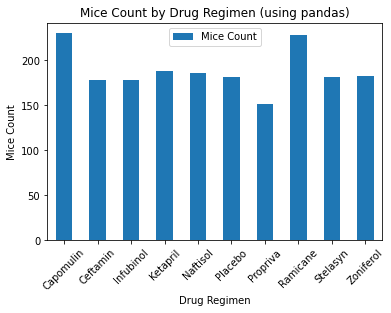

In [24]:
regimen_chart = mice_treatment.plot.bar(x='Drug Regimen', y='Mice Count', rot=45)                                   
regimen_chart.set_xlabel('Drug Regimen')
regimen_chart.set_xlabel('Drug Regimen')
regimen_chart.set_ylabel('Mice Count')
regimen_chart.set_title("Mice Count by Drug Regimen (using pandas)")


In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = mice_treatment['Drug Regimen'].tolist()
mice_count = mice_treatment['Mice Count'].tolist()
x_axis = np.arange(len(mice_count))
x_pos = [i for i, _ in enumerate(x)]



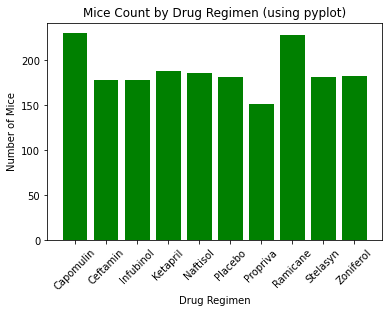

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a bar chart based upon the above data

plt.bar(x_pos, mice_count, color='g', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Count by Drug Regimen (using pyplot)")
plt.xticks(x_pos, x, rotation=45)

# Save and display the chart
plt.savefig("./Images/Bar_chart_Mice_Count_by_Drug_Regimen.png")

# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()

# Gender Pie Chart

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Configure plot and ticks

mice_gender=mouse_study_nodup_df['Sex'].value_counts()
mice_gender=mice_gender.reset_index()
mice_gender=mice_gender.rename(columns={'index': 'Sex', 'Sex': 'Mice Count'})

mice_gender.index=mice_gender['Sex']
mice_gender


,Sex,Mice Count
Sex,,
Male,Male,958
Female,Female,925


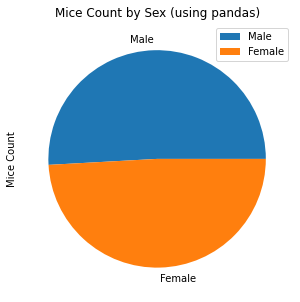

In [28]:
gender_chart = mice_gender.plot.pie(y='Mice Count', figsize=(5,5), title="Mice Count by Sex (using pandas)")



In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x = mice_gender['Sex'].tolist()
mice_count = mice_gender['Mice Count'].tolist()

print(x)
print(mice_count)


['Male', 'Female']
[958, 925]


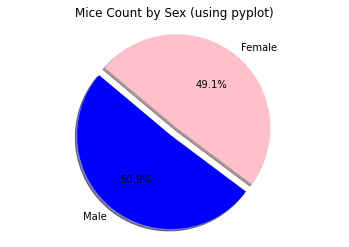

In [30]:
colors = ["blue","pink"]
explode = (0.1,0)
plt.pie(mice_count,  colors=colors, explode=explode, labels=x, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Mice Count by Sex (using pyplot)")
plt.axis("equal")

# Save and display the chart
plt.savefig("./Images/Pie_Chart_mice_count_by_sex.png")

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
#selected_regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filter1=mouse_study_nodup_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
selected_regimen_df=mouse_study_nodup_df[filter1]
selected_regimen_df.shape

(814, 8)

In [32]:
selected_regimen_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

regimen_group=selected_regimen_df.groupby(['Mouse ID'])
timepoint_df=pd.DataFrame(regimen_group['Timepoint'].max())
timepoint_df=timepoint_df.rename(columns={"Timepoint": "Last Timepoint"})
timepoint_df=timepoint_df.reset_index()

In [34]:
timepoint_df.head(10)

,Mouse ID,Last Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
5,a520,45
6,a577,30
7,a644,45
8,a685,45
9,b128,45


In [35]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimen_group_df=pd.merge(selected_regimen_df, timepoint_df, how='inner', left_on=['Mouse ID', 'Timepoint'], \
                          right_on=['Mouse ID', 'Last Timepoint'])

regimen_group_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45
5,s508,Ramicane,Male,1,17,45,30.276232,0,45
6,f966,Capomulin,Male,16,17,20,30.485985,0,20
7,m546,Ramicane,Male,18,16,45,30.564625,1,45
8,z578,Ramicane,Male,11,16,45,30.638696,0,45
9,j913,Ramicane,Female,4,17,45,31.560470,1,45


In [36]:
regimen_group_df.shape

(100, 9)

In [37]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = regimen_group_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    
# Determine outliers using upper and lower bounds
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(lower_bound)
print(upper_bound)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The median of Tumor Volume is: 45.0 
3.0739668737499812
94.04403868375002
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [38]:
outlier_Tumor_Volume = regimen_group_df.loc[(regimen_group_df["Tumor Volume (mm3)"] < lower_bound) | (regimen_group_df["Tumor Volume (mm3)"] > upper_bound)]

outlier_Tumor_Volume   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint



There are no potential outliers across all four treatment regimens. 
outlier_Tumor_Volume has no records. There are no outliers in this dataset.

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin_df = regimen_group_df.loc[(regimen_group_df["Drug Regimen"]=="Capomulin")]
Capomulin = Capomulin_df["Tumor Volume (mm3)"]

Ramicane_df = regimen_group_df.loc[(regimen_group_df["Drug Regimen"]=="Ramicane")]
Ramicane = Ramicane_df["Tumor Volume (mm3)"]

Infubinol_df = regimen_group_df.loc[(regimen_group_df["Drug Regimen"]=="Infubinol")]
Infubinol = Infubinol_df["Tumor Volume (mm3)"]

Ceftamin_df = regimen_group_df.loc[(regimen_group_df["Drug Regimen"]=="Ceftamin")]
Ceftamin = Ceftamin_df["Tumor Volume (mm3)"]

regimen_data= [Capomulin, Ramicane, Infubinol, Ceftamin]


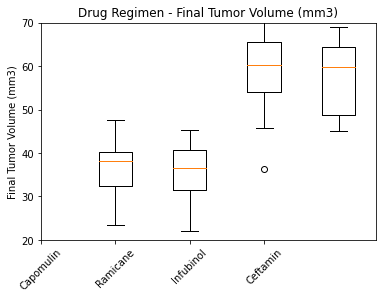

<Figure size 432x288 with 0 Axes>

In [40]:
x=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  
x_pos = [i for i, _ in enumerate(x)]
fig1, ax1 = plt.subplots()


ax1.set_title('Drug Regimen - Final Tumor Volume (mm3)')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(regimen_data)
plt.xticks(x_pos, x)
ax1.set_xticklabels(x, rotation=45, ha='center')

# Set the upper and lower limits of our y axis
plt.ylim(20,70)

plt.show()
plt.savefig("./Images/Boxplot_Final_Tumor_volume.png")

## Line and Scatter Plots

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_1_df=mouse_study_nodup_df.loc[(mouse_study_nodup_df['Drug Regimen']=='Capomulin') \
                                        & (mouse_study_nodup_df['Mouse ID']=='s185')] 
Capomulin_1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [42]:
timepoint = Capomulin_1_df['Timepoint'].tolist()
tumor_volume = Capomulin_1_df["Tumor Volume (mm3)"].tolist()


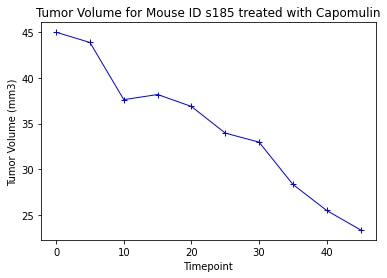

In [43]:
tumor_volume_change, = plt.plot(timepoint, tumor_volume, marker="+",color="blue", linewidth=1, label="Tumor Volume (mm3)")

# Set our legend to where the chart thinks is best
#plt.legend(handles=tumor_volume, loc="best")

# Create labels for the X and Y axis
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Mouse ID s185 treated with Capomulin")

# Save and display the chart
plt.savefig("./Images/tumor_volume_change over_time.png")

plt.show()

## Correlation and Regression

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [44]:
Capomulin_df=mouse_study_nodup_df.loc[(mouse_study_nodup_df['Drug Regimen']=='Capomulin')]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [45]:
weight_group = Capomulin_df.groupby("Weight (g)")
weight_group_df = pd.DataFrame(weight_group["Tumor Volume (mm3)"].mean())
weight_group_df=weight_group_df.reset_index()
weight_group_df=weight_group_df.rename(columns={"Weight (g)":"Weight_grams", "Tumor Volume (mm3)":"average_tumor_volume"})
weight_group_df.head()


,Weight_grams,average_tumor_volume
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700


In [46]:
weight_group_df

,Weight_grams,average_tumor_volume
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [47]:
# Plot mouse weightversus tumor volume on a scatterplot
weight_Capomulin = weight_group_df.Weight_grams
average_tumor_volume = weight_group_df.average_tumor_volume

# Calculate the correlation coefficient between weight and average tumor volume
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(weight_Capomulin,average_tumor_volume)[0],2)}")


The correlation coefficient between weight and average tumor volume is 0.95


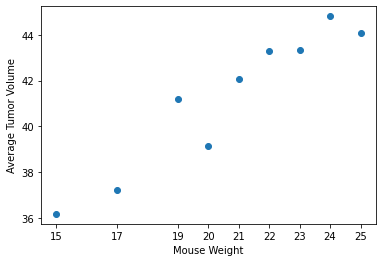

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

mouse_weight = weight_group_df["Weight_grams"].tolist()
average_tumor_volume = weight_group_df["average_tumor_volume"].tolist()

plt.scatter(mouse_weight,average_tumor_volume)
plt.xticks(mouse_weight, rotation=360)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')

# Save and display the chart
plt.savefig("./Images/Scatter_Plot_weight_vs_tumor_volume.png")
plt.show()


In [49]:
# Perform a linear regression on mouse weight and average tumor volume
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(mouse_weight, average_tumor_volume)

print(vc_slope)
print(vc_int)

0.894772609734063
22.764229983591896


In [50]:
# Create equation of line to calculate mouse weight and average tumor volume
mouse_weight=weight_group_df.iloc[:,0]
average_tumor_volume=weight_group_df.iloc[:,1]

vc_fit = vc_slope * mouse_weight + vc_int

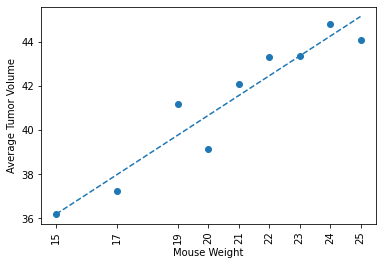

In [51]:
# Plot the linear model on top of scatter plot 

plt.scatter(mouse_weight,average_tumor_volume)
plt.plot(mouse_weight,vc_fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')

# Save and display the chart
plt.savefig("./Images/Linear_model_over_Scatter_Plot_weight_vs_tumor_volume.png")
plt.show()